<a href="https://colab.research.google.com/github/LPValente/TensorFlow2.0/blob/main/TF2_0_Linear_Classification_Live.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1

In [ ]:
try:
  %tensorflow_version 2.x # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.12.0


In [ ]:
# load in the data
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
type(data)

sklearn.utils._bunch.Bunch

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
data.data.shape

(569, 30)

In [ ]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.33)

In [ ]:
N, D = X_train.shape

In [ ]:
N, D

(381, 30)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Alternative
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 3s 80ms/step - loss: 0.4010 - accuracy: 0.8871 - val_loss: 0.4005 - val_accuracy: 0.8989
Epoch 2/100
12/12 [==============================] - 0s 12ms/step - loss: 0.3617 - accuracy: 0.9055 - val_loss: 0.3662 - val_accuracy: 0.9202
Epoch 3/100
12/12 [==============================] - 0s 15ms/step - loss: 0.3292 - accuracy: 0.9265 - val_loss: 0.3372 - val_accuracy: 0.9255
Epoch 4/100
12/12 [==============================] - 0s 9ms/step - loss: 0.3023 - accuracy: 0.9318 - val_loss: 0.3127 - val_accuracy: 0.9309
Epoch 5/100
12/12 [==============================] - 0s 20ms/step - loss: 0.2795 - accuracy: 0.9396 - val_loss: 0.2927 - val_accuracy: 0.9521
Epoch 6/100
12/12 [==============================] - 0s 15ms/step - loss: 0.2610 - accuracy: 0.9501 - val_loss: 0.2756 - val_accuracy: 0.9521
Epoch 7/100
12/12 [==============================] - 0s 24ms/step - loss: 0.2454 - accuracy: 0.9554 - val_loss: 0.2607 - val_accuracy: 0.9521
Epoch 8

In [ ]:
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 2ms/step - loss: 0.0774 - accuracy: 0.9843
Train score: [0.07739124447107315, 0.9842519760131836]
6/6 [==============================] - 0s 3ms/step - loss: 0.0929 - accuracy: 0.9787
Test score: [0.09291797131299973, 0.978723406791687]


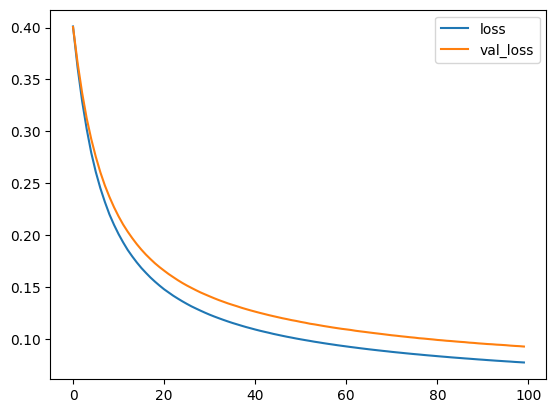

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

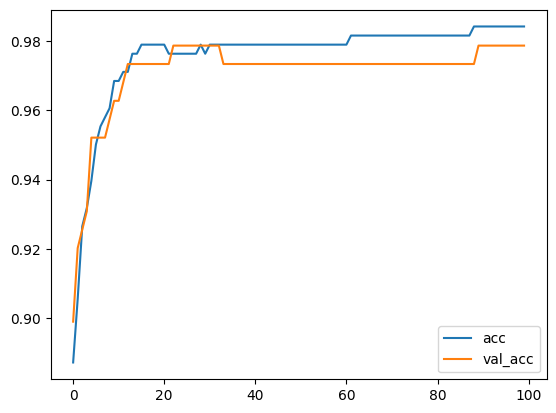

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

# Part 2

In [ ]:
# Make predictions
P = model.predict(X_test)
print(P) 

6/6 [==============================] - 0s 6ms/step
[[4.73323762e-01]
 [9.92822587e-01]
 [9.81011391e-01]
 [9.23518240e-01]
 [9.99823809e-01]
 [9.96397376e-01]
 [9.49057341e-01]
 [4.86112207e-01]
 [9.40027595e-01]
 [1.47355553e-02]
 [9.99938428e-01]
 [8.66403043e-01]
 [7.05007911e-01]
 [9.96633470e-01]
 [1.01517752e-01]
 [2.19426826e-02]
 [4.35231589e-02]
 [1.34284481e-01]
 [9.96342719e-01]
 [7.79437900e-01]
 [4.93878275e-01]
 [5.71206724e-03]
 [9.95071173e-01]
 [1.82877193e-05]
 [1.96111891e-02]
 [9.89479959e-01]
 [9.91543651e-01]
 [9.97284114e-01]
 [8.23231578e-01]
 [9.82192099e-01]
 [9.96744573e-01]
 [1.68464680e-06]
 [1.18090369e-01]
 [9.99282479e-01]
 [6.53507233e-01]
 [9.85315800e-01]
 [6.61939521e-06]
 [9.93753731e-01]
 [2.45545030e-01]
 [9.93206501e-01]
 [9.96281385e-01]
 [9.99495864e-01]
 [9.84746158e-01]
 [9.99972284e-01]
 [9.81976688e-01]
 [9.94360328e-01]
 [9.96317148e-01]
 [9.99321043e-01]
 [9.95972037e-01]
 [4.50463504e-01]
 [9.99267638e-01]
 [8.64105701e-01]
 [9.96727943e

In [ ]:
# Round to get the actual predictions
# NOte: has to be flattened since the targets are size (N,) while the predictions are size (N,1)
import numpy as np
P = np.round(P).flatten()
print(P)

[0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1.
 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.]


In [ ]:
# Calculate the accuracy, compare it to evaluate() output
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9787234042553191
6/6 [==============================] - 0s 4ms/step - loss: 0.0929 - accuracy: 0.9787
Evaluate output: [0.09291797131299973, 0.978723406791687]


# Part 3

In [ ]:
# Let's now save our model to a file
model.save('linearclassifier.h5')

In [ ]:
# Check that the model file exists
!ls -lh

total 24K
-rw-r--r-- 1 root root  20K May 20 23:01 linearclassifier.h5
drwxr-xr-x 1 root root 4.0K May 18 13:38 sample_data


In [ ]:
# Let's load the model and confirm that it still works
# Note: there is a bug in Keras where load/save only works if you DON't use the Input() layer explicitly
# So, make sure you define the model with Only Dense(1, input_shape=(D,))
# At least, until the bug is fixed
# https://github.com/keras-team/keras/issues/10417
model = tf.keras.models.load_model('linearclassifier.h5')
print(model.layers)
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.0929 - accuracy: 0.9787


[0.09291797131299973, 0.978723406791687]